# CS5304 Final Project
## Part 2 - Modified Model
### teammember: Shang Zhou - sz536, Zongcheng Yang - zy338

## Initialization

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import cv2

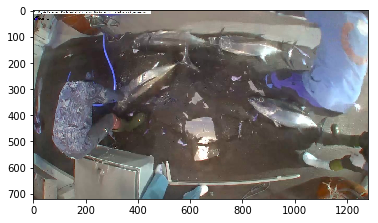

In [38]:
img = cv2.imread("image.jpg")
plt.imshow(img)
plt.show()

In [39]:
lower = np.array([0, 0, 0])
upper = np.array([15, 15, 15])
shapeMask = cv2.inRange(img, lower, upper)
shapeMask.shape

(720, 1280)

In [40]:
# find the contours in the mask
cnts, _ = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I found %d black shapes" % (len(cnts)))
cv2.imshow("Mask", shapeMask)
 
# loop over the contours
for c in cnts:
# draw the contour and show it
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.imshow("Image", image)
    cv2.waitKey(0)

ValueError: too many values to unpack (expected 2)

In [41]:
%matplotlib inline
import os 
from scipy import ndimage
from subprocess import check_output
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<matplotlib.axes._subplots.AxesSubplot at 0x121494588>,
 <matplotlib.image.AxesImage at 0x1828995978>)

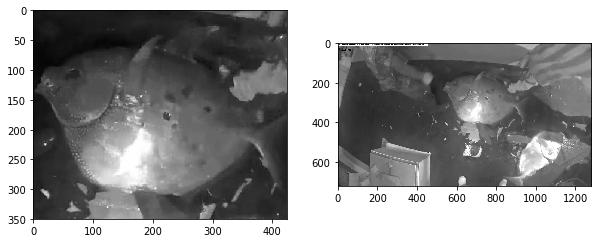

In [42]:
rows, cols= 350, 425
im_array = cv2.imread('data/train/LAG/img_00091.jpg', 0)
template = np.zeros([rows, cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[100:450, 525:950] # I try multiple times to find the correct rectangle. 
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121), plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

[[ -8.82810960e+07  -8.84070320e+07  -8.84926320e+07 ...,  -1.34422160e+08
   -1.34362480e+08  -1.34290432e+08]
 [ -8.55635200e+07  -8.56798560e+07  -8.57610640e+07 ...,  -1.34017552e+08
   -1.33959744e+08  -1.33896120e+08]
 [ -8.28175440e+07  -8.29248880e+07  -8.30096560e+07 ...,  -1.33556264e+08
   -1.33498384e+08  -1.33443928e+08]
 ..., 
 [  5.33373280e+07   5.38024920e+07   5.42650280e+07 ...,  -2.19036400e+07
   -2.23203540e+07  -2.27101720e+07]
 [  5.38081480e+07   5.42516800e+07   5.46873120e+07 ...,  -2.08366780e+07
   -2.12742520e+07  -2.16886300e+07]
 [  5.42751800e+07   5.47009440e+07   5.51156280e+07 ...,  -1.98194420e+07
   -2.02873940e+07  -2.07396000e+07]]


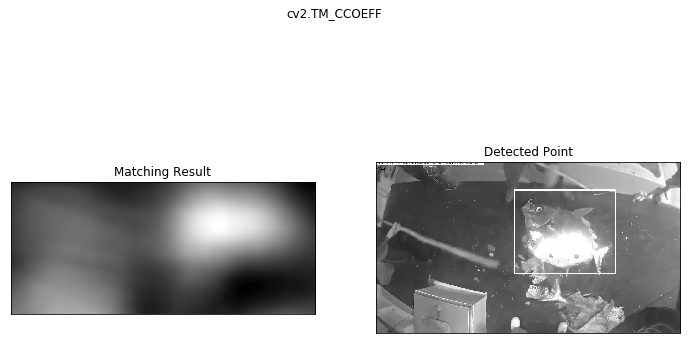

[[-0.30627081 -0.30694816 -0.30746579 ..., -0.41990688 -0.42038271
  -0.42078581]
 [-0.30351716 -0.30418476 -0.30470946 ..., -0.4183915  -0.41887182
  -0.41930434]
 [-0.30073303 -0.30139285 -0.30195239 ..., -0.41670394 -0.41718212
  -0.41764122]
 ..., 
 [ 0.18551148  0.18681322  0.1880997  ..., -0.09351946 -0.09509987
  -0.09658164]
 [ 0.18716508  0.18838908  0.18957813 ..., -0.09022581 -0.09186816
  -0.09342908]
 [ 0.18880486  0.18996415  0.19107908 ..., -0.08704754 -0.08877967
  -0.09045807]]


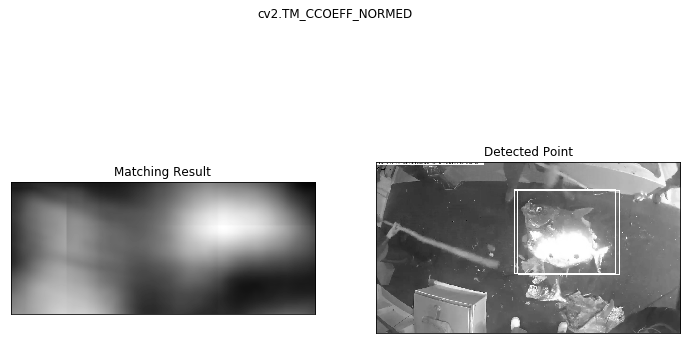

[[  1.19643366e+09   1.19525709e+09   1.19410637e+09 ...,   2.36666317e+09
    2.36635750e+09   2.36607744e+09]
 [  1.19100070e+09   1.18983654e+09   1.18869248e+09 ...,   2.36538112e+09
    2.36506778e+09   2.36477517e+09]
 [  1.18560934e+09   1.18445811e+09   1.18331290e+09 ...,   2.36421478e+09
    2.36389427e+09   2.36358707e+09]
 ..., 
 [  1.71851981e+09   1.71996454e+09   1.72140685e+09 ...,   1.85171405e+09
    1.84847437e+09   1.84520563e+09]
 [  1.72167898e+09   1.72311078e+09   1.72453376e+09 ...,   1.85035827e+09
    1.84710182e+09   1.84381056e+09]
 [  1.72487014e+09   1.72629146e+09   1.72770227e+09 ...,   1.84900531e+09
    1.84572403e+09   1.84239949e+09]]


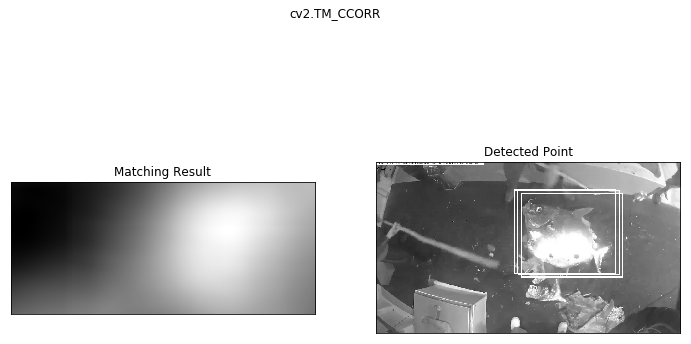

[[ 0.75755996  0.75742823  0.75730914 ...,  0.85066545  0.85071301
   0.85076714]
 [ 0.7615639   0.76144719  0.76133937 ...,  0.85068238  0.85073072
   0.85078448]
 [ 0.76573998  0.76563847  0.76553768 ...,  0.85071552  0.85076356
   0.85081506]
 ..., 
 [ 0.88002717  0.88010973  0.88018918 ...,  0.84361863  0.84337258
   0.8431375 ]
 [ 0.88043702  0.88050854  0.88057417 ...,  0.84407997  0.84382313
   0.84357518]
 [ 0.88084674  0.88090914  0.88096446 ...,  0.84452266  0.84425163
   0.84398609]]


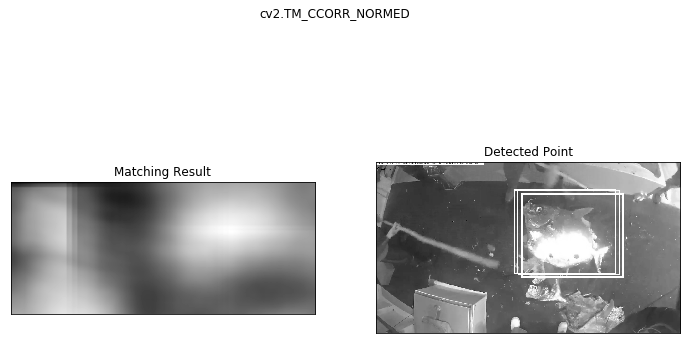

[[  8.40342784e+08   8.40637824e+08   8.40894976e+08 ...,   1.24077107e+09
    1.24006067e+09   1.23926682e+09]
 [  8.26474752e+08   8.26749440e+08   8.26996736e+08 ...,   1.23899238e+09
    1.23826739e+09   1.23746688e+09]
 [  8.12557568e+08   8.12812032e+08   8.13064448e+08 ...,   1.23716915e+09
    1.23643622e+09   1.23563725e+09]
 ..., 
 [  4.68606592e+08   4.68621952e+08   4.68651904e+08 ...,   7.51287552e+08
    7.50427392e+08   7.49467648e+08]
 [  4.67627008e+08   4.67689344e+08   4.67777024e+08 ...,   7.47486976e+08
    7.46686464e+08   7.45796608e+08]
 [  4.66657280e+08   4.66760064e+08   4.66893056e+08 ...,   7.43835136e+08
    7.43111424e+08   7.42310912e+08]]


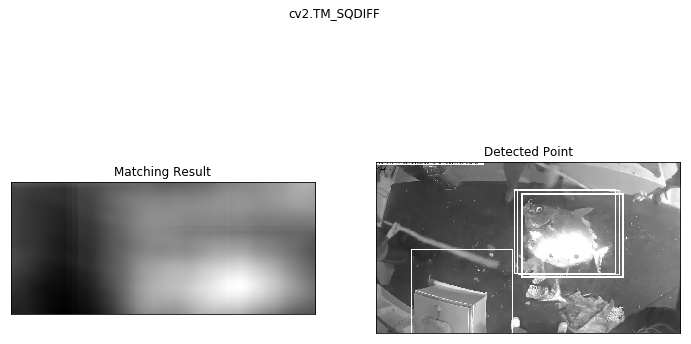

[[ 0.53209054  0.53270853  0.53330123 ...,  0.43547788  0.43526489
   0.43502364]
 [ 0.52847421  0.5290857   0.52967846 ...,  0.43505707  0.43484035
   0.43459815]
 [ 0.52479988  0.52540487  0.52600747 ...,  0.43461677  0.43439871
   0.43415824]
 ..., 
 [ 0.25614831  0.25599819  0.2558603  ...,  0.33530098  0.33541617
   0.33549872]
 [ 0.25435439  0.2542161   0.25409469 ...,  0.3340669   0.33420607
   0.33431742]
 [ 0.252608    0.25247779  0.25236562 ...,  0.33288738  0.33305833
   0.33320728]]


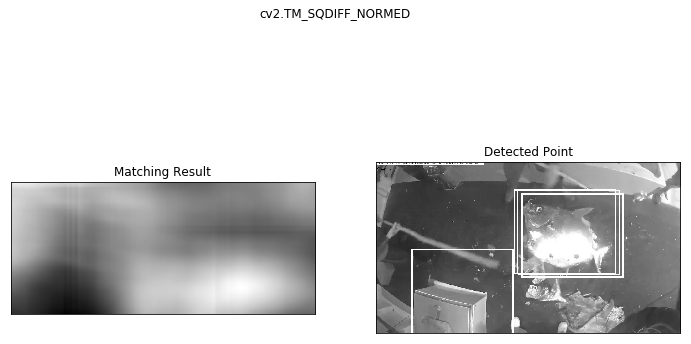

In [124]:
file = 'data/train/LAG/img_01512.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file, 0) 
img2 = img
width, height = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(img, top_left, bottom_right, 255, 3)
    fig, ax = plt.subplots(figsize=(12, 7))
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img, cmap ='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

(846, 506)
(435, 720)
(670, 357)
(633, 533)


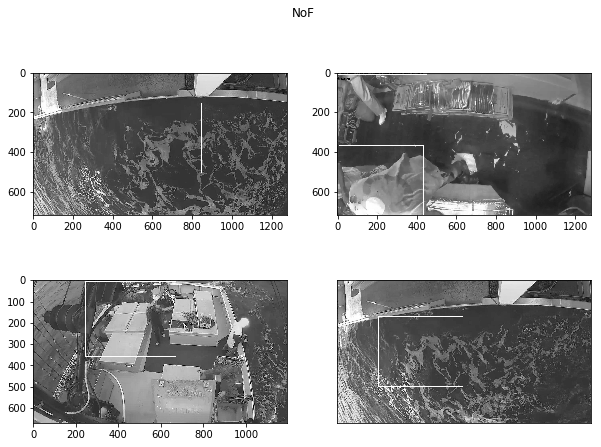

(1280, 663)
(539, 720)
(483, 705)
(1280, 668)


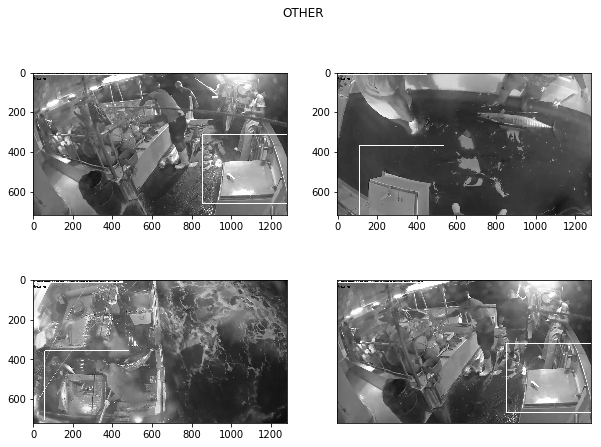

(1126, 350)
(596, 651)
(1280, 507)
(618, 720)


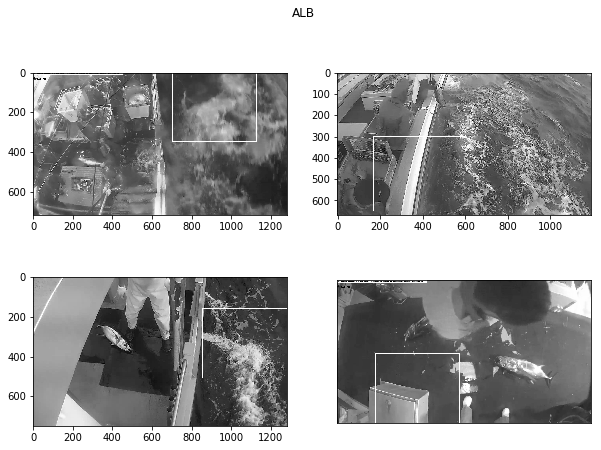

(1171, 350)
(1255, 704)
(851, 867)
(862, 706)


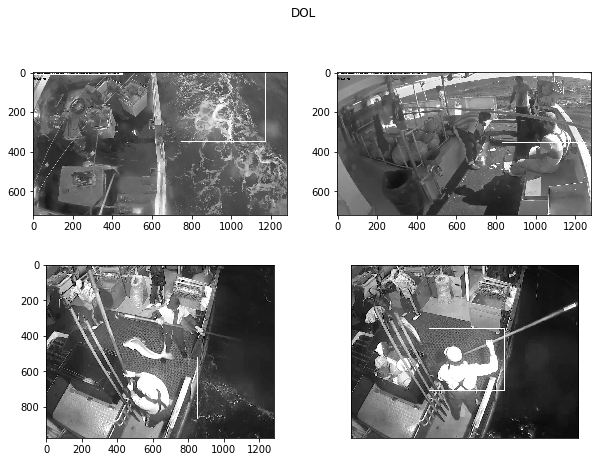

(955, 435)
(538, 617)
(519, 624)
(889, 720)


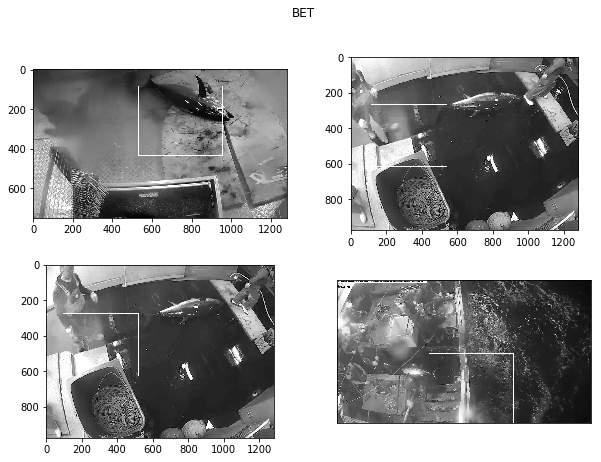

(1015, 472)
(898, 503)
(986, 351)
(1249, 585)


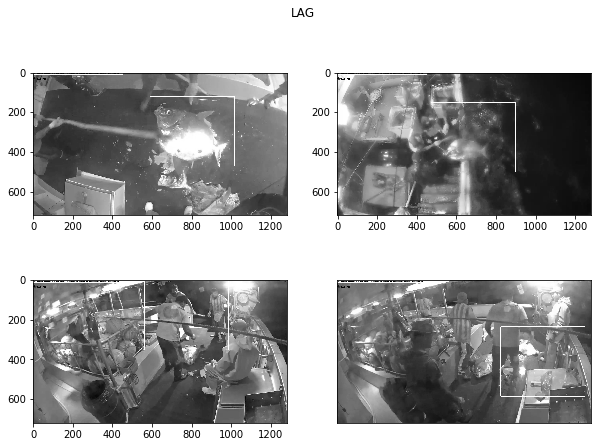

(452, 350)
(886, 720)
(515, 974)
(838, 574)


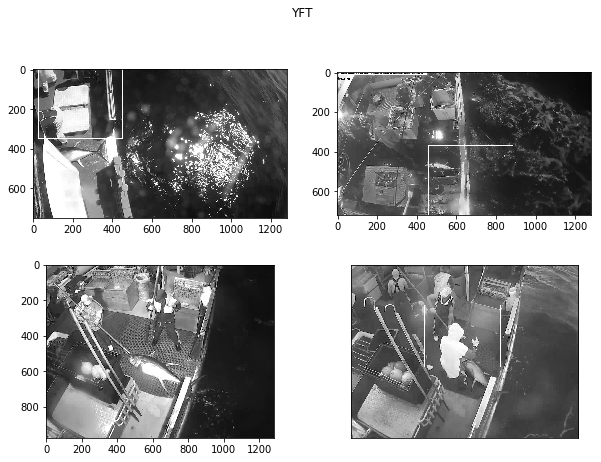

(888, 720)
(887, 720)
(888, 720)
(883, 720)


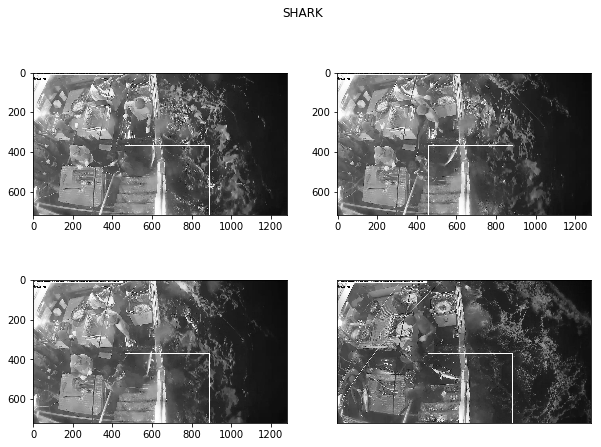

In [76]:
method = eval('cv2.TM_CCOEFF')
indexes=[1, 30, 40, 5]

train_path = "data/train/"
sub_folders = [d for d in os.listdir(train_path)]
for sub_folder in sub_folders:
    if sub_folder == ".DS_Store":
        continue
    files = [f for f in os.listdir(train_path + sub_folder)]
    k = 0
    _, ax = plt.subplots(2,2,figsize=(10, 7))
    for file in [files[x] for x in indexes]: # I take only 4 images of each group. 
        img = cv2.imread(train_path + sub_folder + "/" + file, 0)
        img2 = img
        width, height = template.shape[::-1]
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)
 
        cv2.rectangle(img, top_left, bottom_right, 255, 2)
        if k == 0: 
            ax[0, 0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k == 1: 
            ax[0, 1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k == 2: 
            ax[1, 0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k == 3: 
            ax[1, 1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        k += 1
    plt.suptitle(sub_folder)
    plt.show()

In [118]:
def Sample_Plot(annotation_path, label, image, top_left, bottom_right, i):
    img = cv2.imread(annotation_path + label + '/' + image , 0)
    cv2.rectangle(img, top_left, bottom_right, 255, 3)
    #fig, ax = plt.subplots(figsize=(12, 7))
    plt.subplot(3, 2, i)
    plt.imshow(img, cmap ='gray')
    plt.title(label)
    plt.xticks([])
    plt.yticks([])

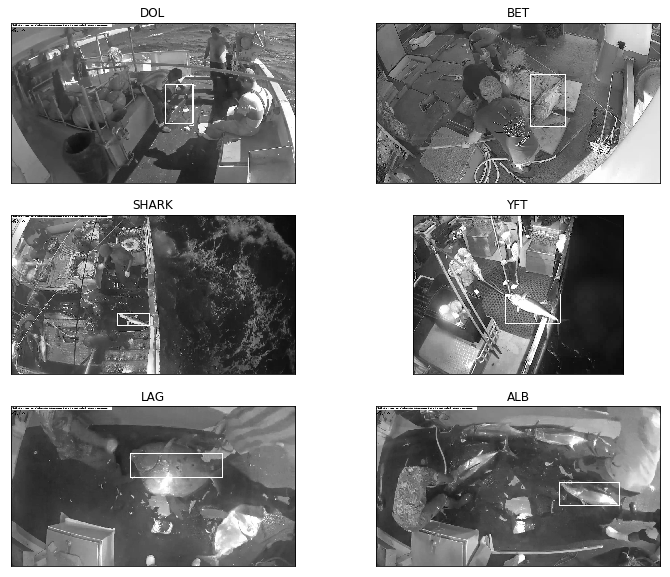

In [119]:
import json
from pprint import pprint

annotation_path = 'data/preprocess_train/'
labels = ['DOL', 'BET', 'SHARK', 'YFT', 'LAG', 'ALB']
top_lefts = []
bottom_rights = []
images = []

for label in os.listdir(annotation_path):
    with open(annotation_path + label) as file:    
        data = json.load(file)
    top_lefts.append((int(data[1]["annotations"][0]['x']), int(data[1]["annotations"][0]['y'])))
    bottom_rights.append((int(data[1]["annotations"][1]['x']), int(data[1]["annotations"][1]['y'])))
    images.append(data[1]["filename"])

fig, ax = plt.subplots(3, 2, figsize=(12, 10))
for i, label in enumerate(labels):
    Sample_Plot(train_path, label, images[i], top_lefts[i], bottom_rights[i], i + 1)
plt.show()

In [123]:
threshold1 = 2000
threshold2 = 5000

In [129]:
mat = (img[:200, :125] - img[-200:, -125:]).reshape(25000)**2

In [130]:
np.sqrt(sum(i for i in mat) / sum(1 for i in mat))

9.3025738373850064